# Diabetes Random Forest Explore

In [2]:
# Como primer paso se cargan los datos
import pandas as pd

all_data = pd.read_csv("../data/diabetes.csv")
all_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
all_data = all_data.drop_duplicates().reset_index(drop=True) # En esta línea se eliminan los duplicados 
all_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
all_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## EDA

### Análisis univariado

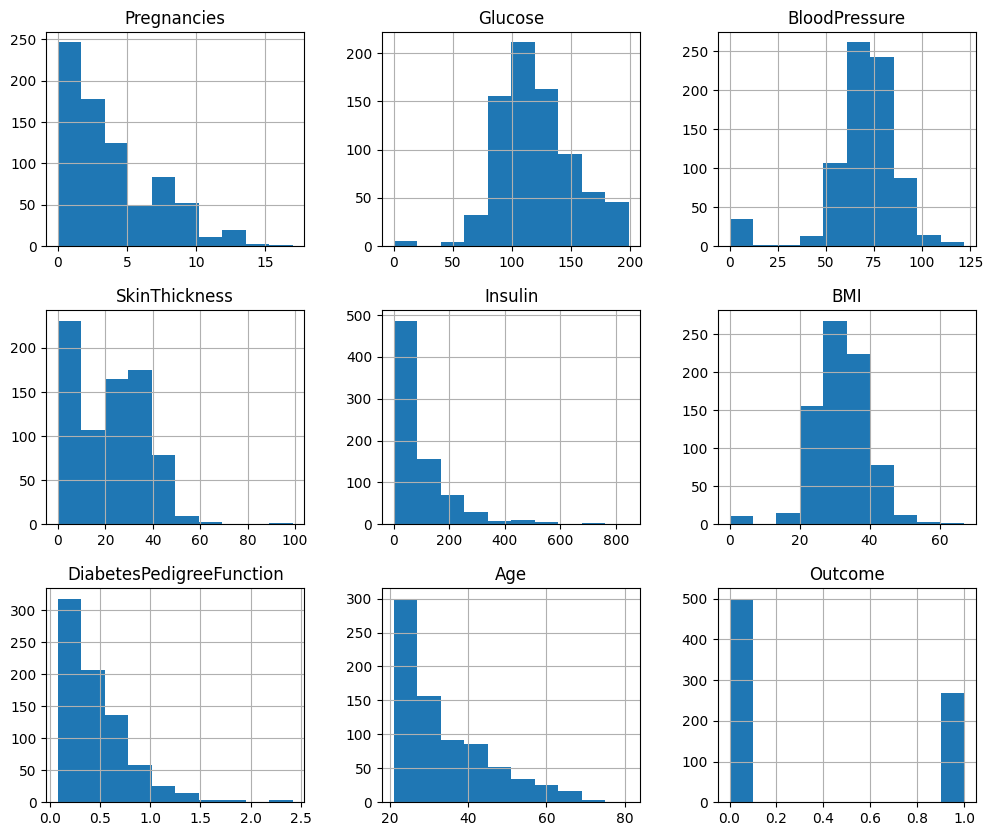

In [6]:
import matplotlib.pyplot as plt


all_data.hist(figsize=(12,10))
plt.show()

Se observarán las variables que en las gráficas previas se perciben con outliers.

<Axes: xlabel='SkinThickness'>

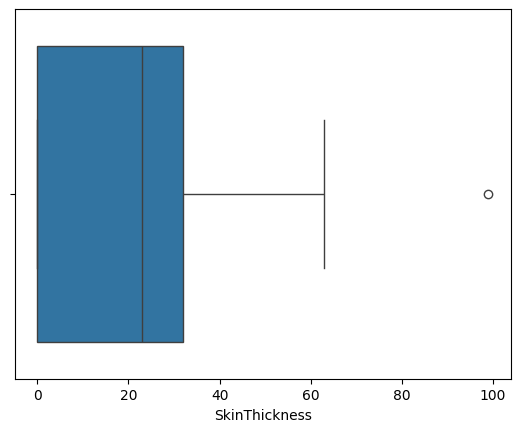

In [7]:
import seaborn as sns

sns.boxplot(x=all_data["SkinThickness"])

<Axes: xlabel='Insulin'>

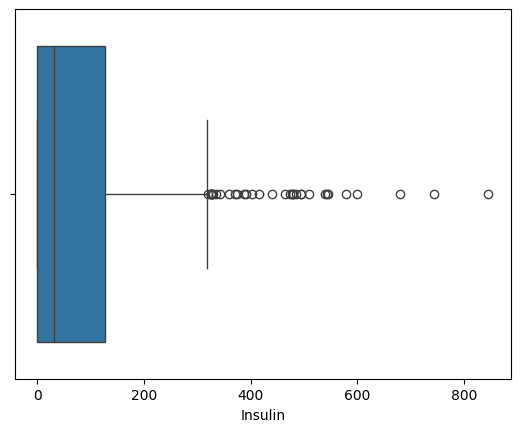

In [9]:
sns.boxplot(x=all_data["Insulin"])

<Axes: xlabel='DiabetesPedigreeFunction'>

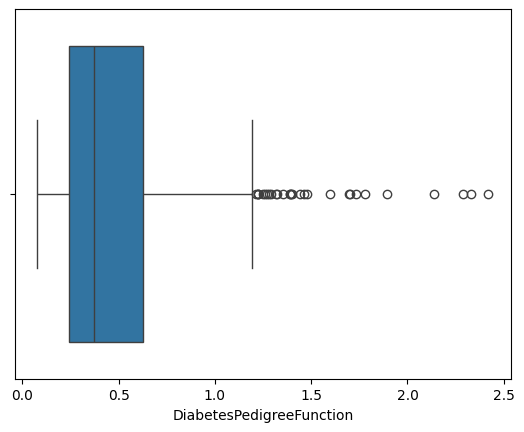

In [10]:
sns.boxplot(x=all_data["DiabetesPedigreeFunction"])

<Axes: xlabel='Age'>

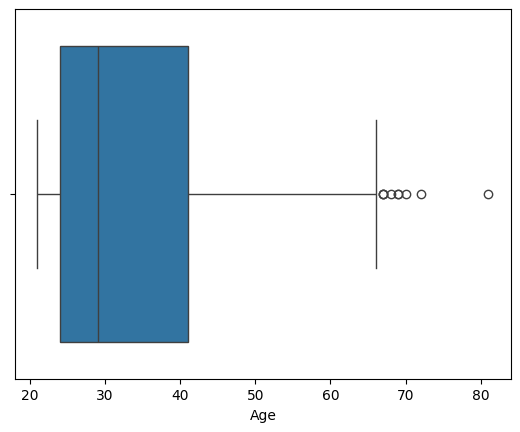

In [11]:
sns.boxplot(x=all_data["Age"])

## Análisis Bivariado

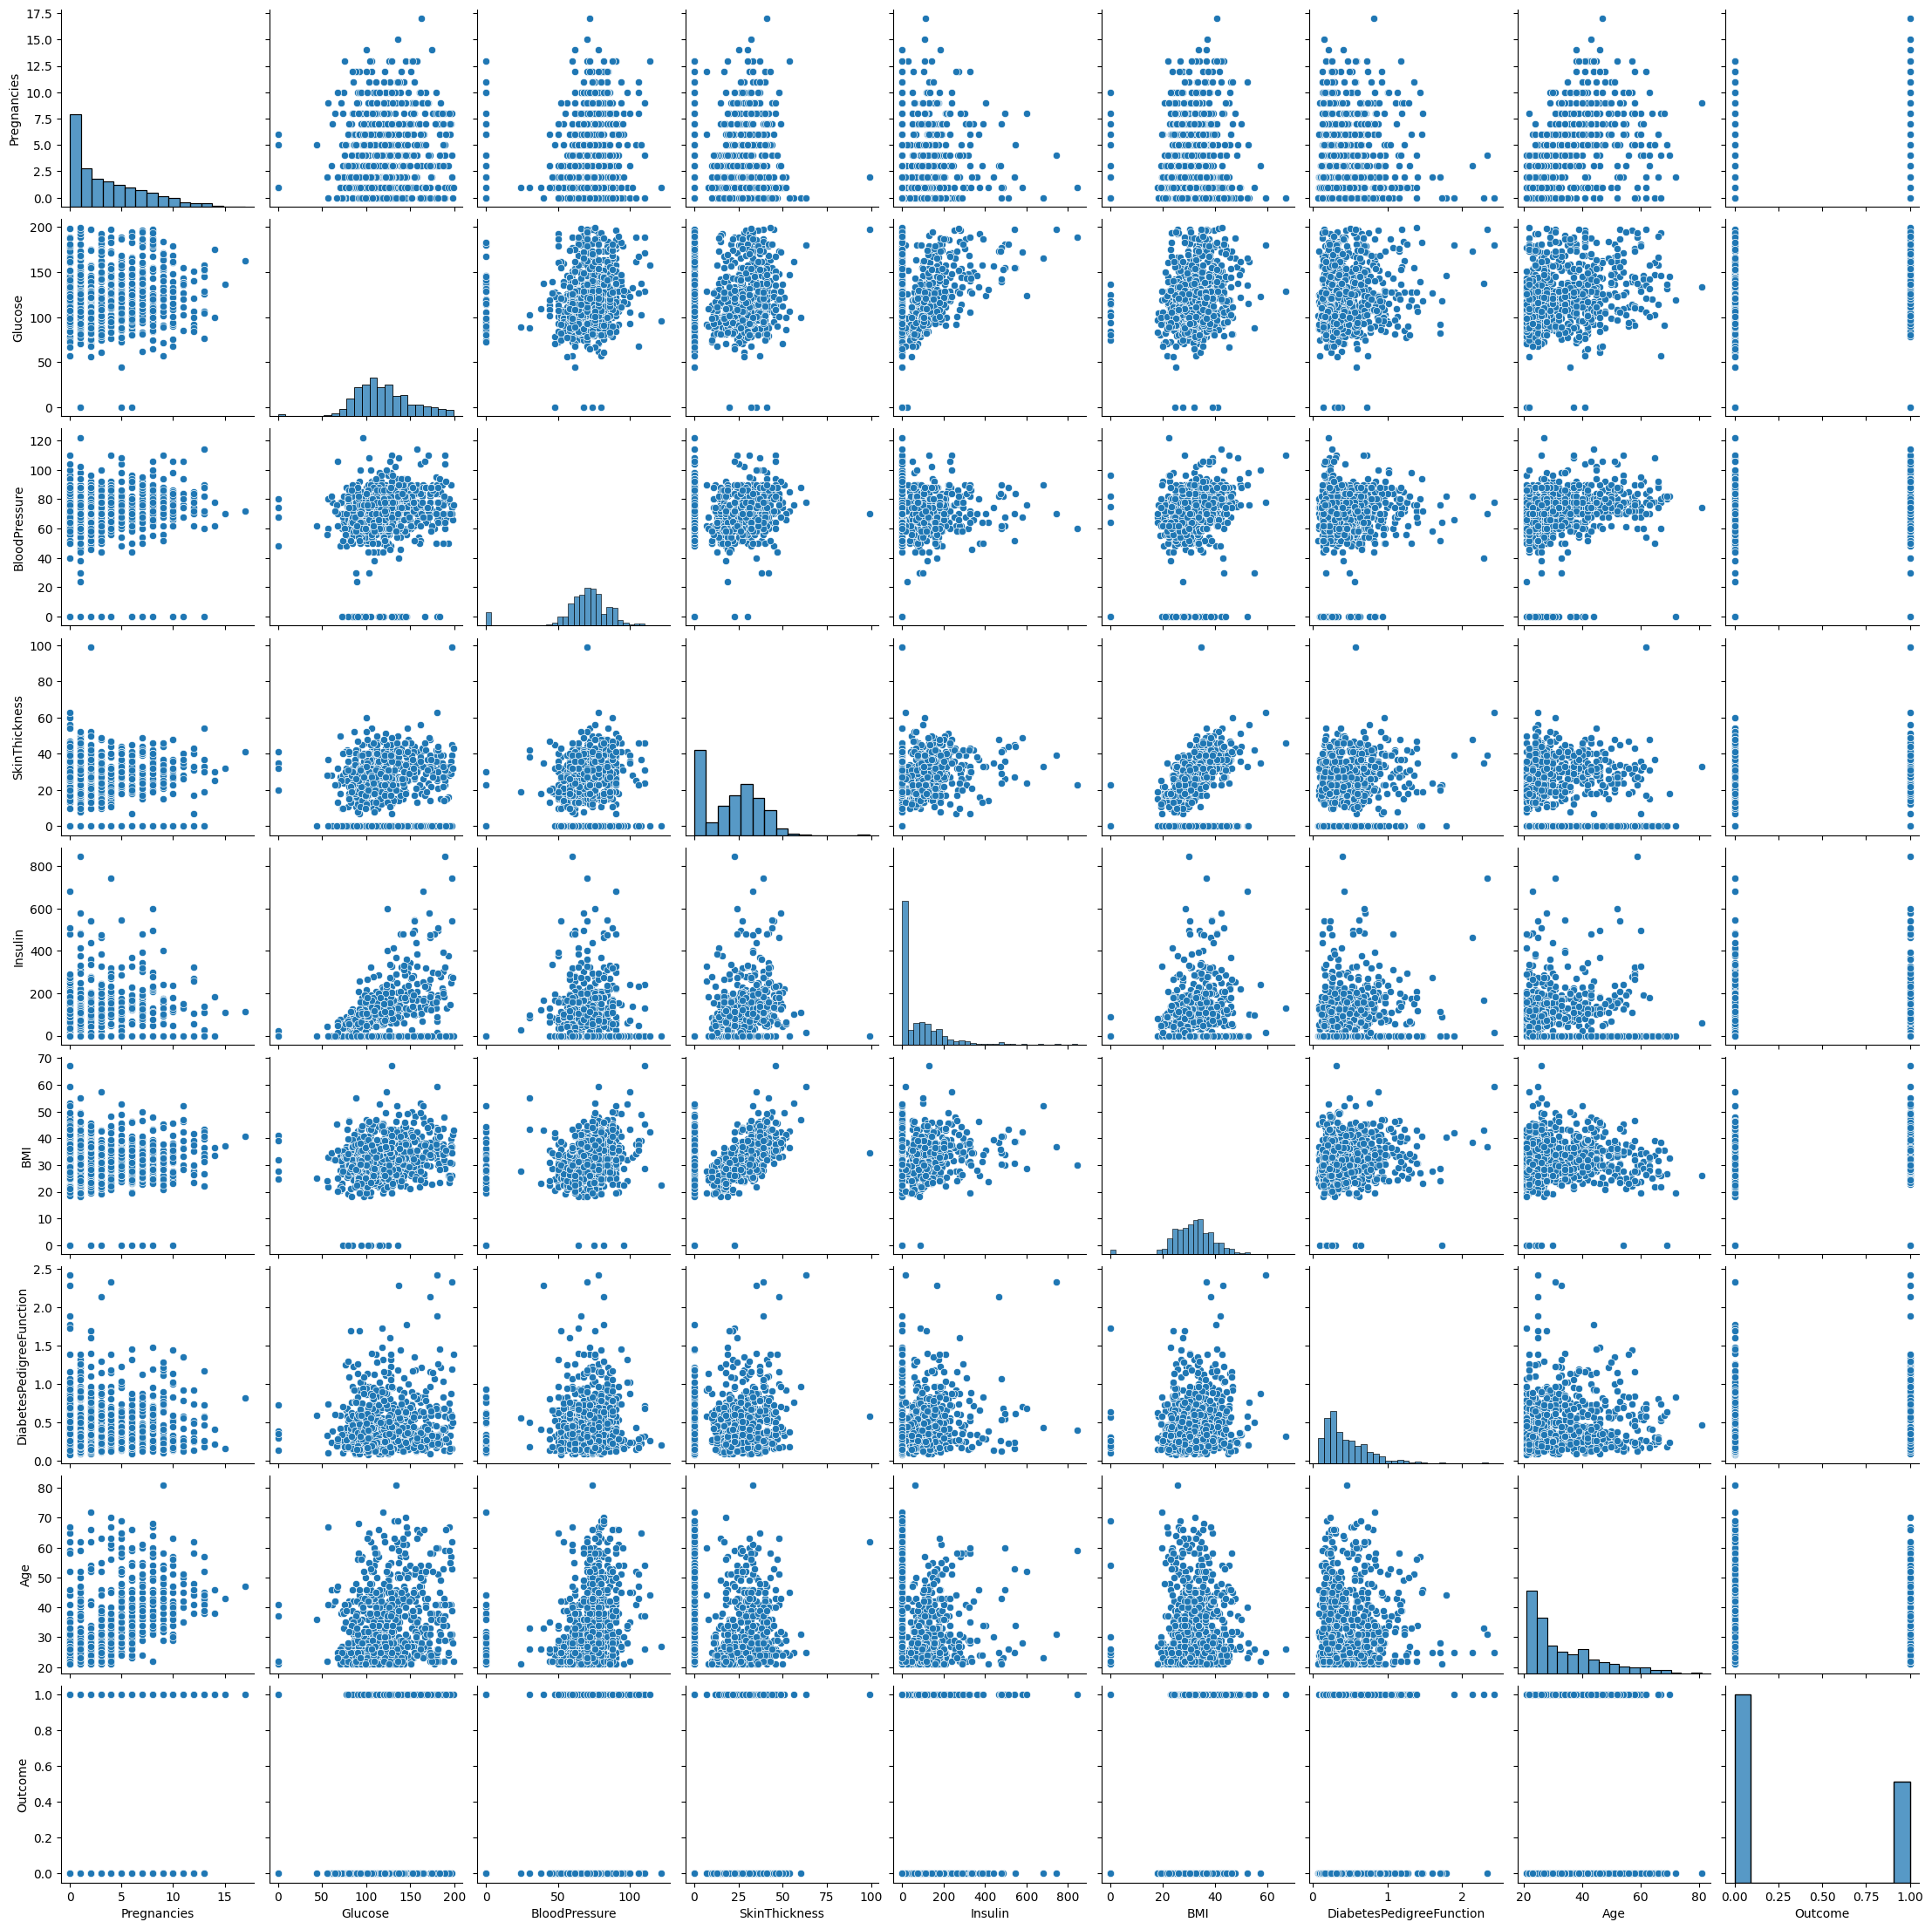

In [12]:
sns.pairplot(all_data)

## Correlaciones

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

scaler = MinMaxScaler()
# Se separa la variable target, pues esta no debe normalizarse
outcome_data = all_data['Outcome']
data = all_data.drop(columns=['Outcome'])
# Normalización de la data
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
normalized_data['Outcome'] = pd.Series(outcome_data)

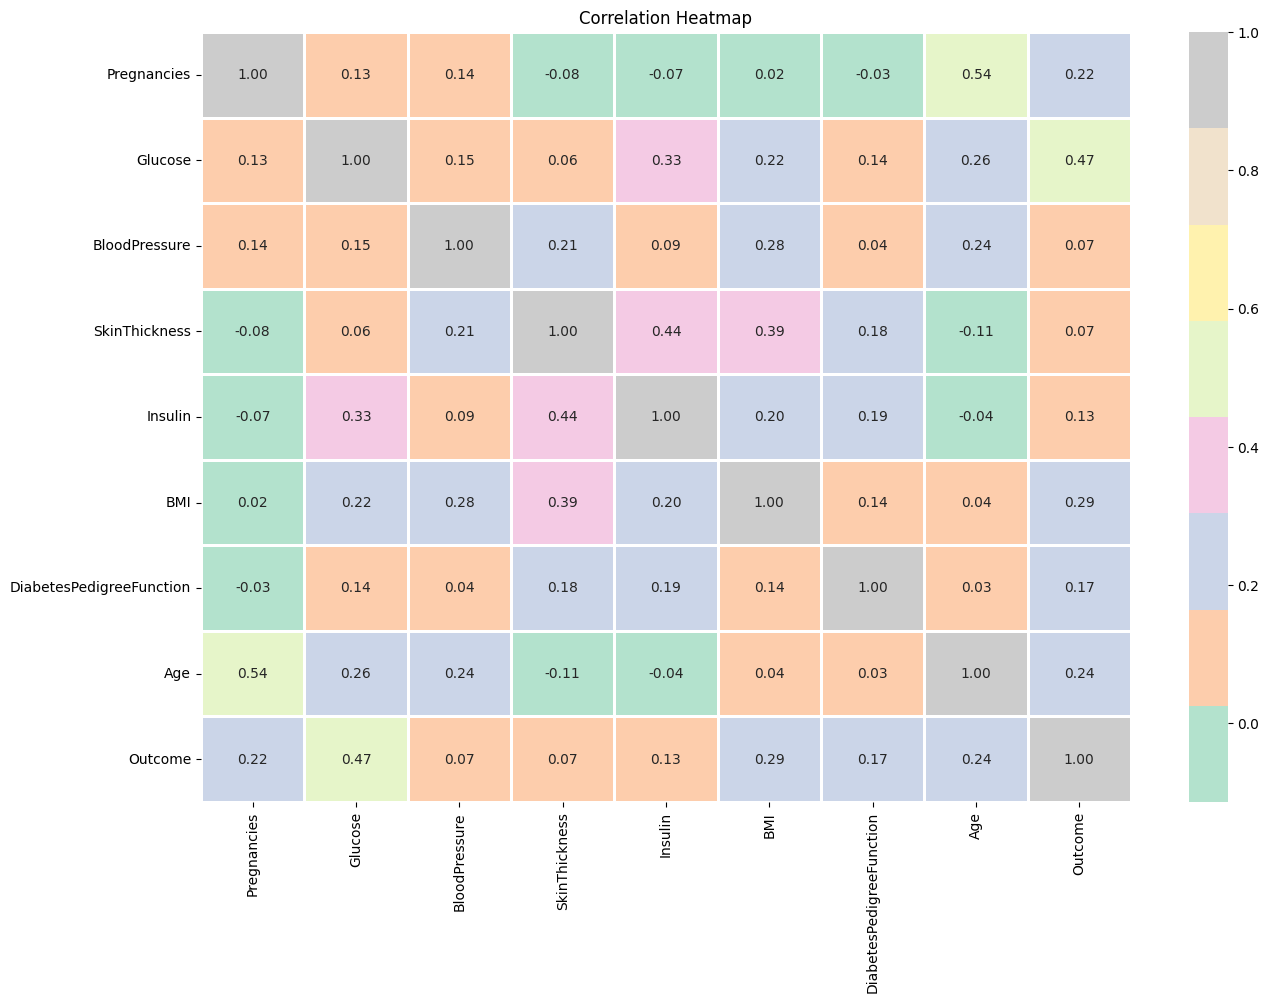

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_data.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

## Construir un random forest

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = all_data.drop("Outcome", axis = 1)
y = all_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [4]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [5]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/diabetes_train.csv", index = False)
X_test_sel.to_csv("../data/processed/diabetes_test.csv", index = False)

In [6]:
diabetes_train_data = pd.read_csv("../data/processed/diabetes_train.csv")
diabetes_test_data = pd.read_csv("../data/processed/diabetes_test.csv")

diabetes_train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

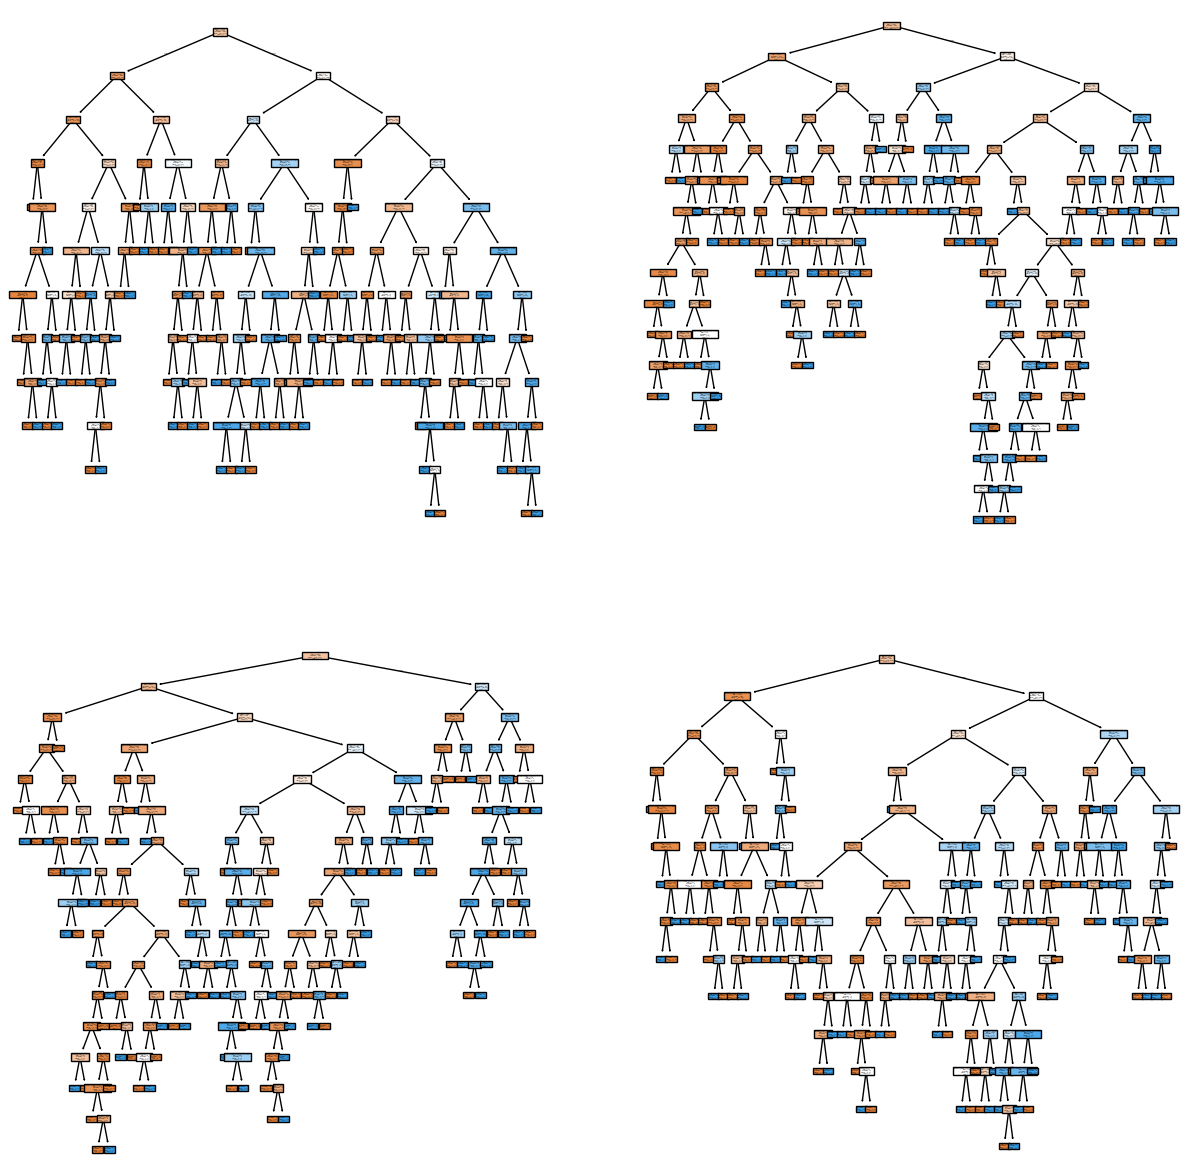

In [8]:
# Visualizar cada árbol generado por el modelo
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [10]:
## Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Para saber si el modelo esta acertando o no, se utiliza la métrica de precisión 
accuracy_score(y_test, y_pred)

0.7207792207792207

In [12]:
# También se observa el recall para comparar la sensibilidad del modelo
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.6181818181818182


### Matriz de Confusión

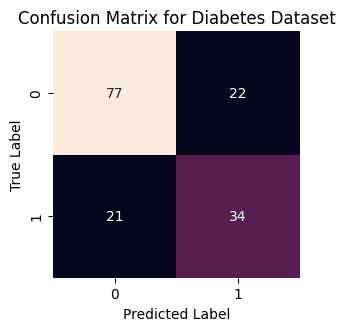

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Además, se añade una matriz de confusión con el fin de comprobar los aciertos y errores del modelo

diabetes_cm = confusion_matrix(y_test, y_pred)

# En esta parte se dibuja la matriz de confusión
cm_df = pd.DataFrame(diabetes_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()
plt.title('Confusion Matrix for Diabetes Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

## RadomizedSearchCV

In [14]:
# Con el fin de mejorar el modelo se usa la hiperparámetrización
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

## Optimización

rf_random = {"n_estimators": np.arange(200,600, 100),
           "max_depth": [None,5,10,15,20],
           "min_samples_split": np.arange(2,20, 2),
           "min_samples_leaf": np.arange(2, 20, 2),
           "max_features": [1,2,3,4,"sqrt","log2"]}

### RandomizedSearchCV

rs_model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_random,
                              scoring    = "accuracy",
                              n_iter= 20,
                              cv=5,
                              verbose=True)

## Entrenamiento
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': [1, 2, 3, 4, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([200, 300, 400, 500])},
                   scoring='accuracy', verbose=True)

In [15]:
# Mejores parámetros

rs_model.best_params_

{'n_estimators': np.int64(300),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(2),
 'max_features': 2,
 'max_depth': None}

In [16]:
rs_model_best = RandomForestClassifier(**rs_model.best_params_)
rs_model_best.fit(X_train, y_train)

RandomForestClassifier(max_features=2, min_samples_leaf=np.int64(2),
                       min_samples_split=np.int64(6),
                       n_estimators=np.int64(300))

In [17]:
y_pred_rs = rs_model_best.predict(X_test)

In [18]:
## Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rs))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [19]:
accuracy_rs = accuracy_score(y_test, y_pred_rs)
print(f"Accuracy score: {accuracy_rs}")

Accuracy score: 0.7597402597402597


In [20]:
recall = recall_score(y_test, y_pred_rs)
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.6727272727272727


## GridSearch

In [ ]:
# Importar libreria

from sklearn.model_selection import GridSearchCV

## Optimización

rf_grid = {"n_estimators": np.arange(400,500, 100),
           "max_depth": [20,22],
           "min_samples_split": [16,18],
           "min_samples_leaf": [3,5],
           "max_features": [2,3,4]}

### GridSearchCV

gd_model = GridSearchCV(RandomForestClassifier(),
                              param_grid=rf_grid,
                              scoring    = "accuracy",
                              n_jobs= -1,
                              cv=5,
                              verbose=True)

## Entrenamiento
gd_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 22], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [16, 18],
                         'n_estimators': array([400])},
             scoring='accuracy', verbose=True)

In [22]:
gd_model.best_params_

{'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 16,
 'n_estimators': np.int64(400)}

In [ ]:
# Se ajusta el modelo con los parámetros más óptimos 
gd_model_best = RandomForestClassifier(**gd_model.best_params_)
gd_model_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=3,
                       min_samples_split=16, n_estimators=np.int64(400))

In [24]:
y_pred_gd = gd_model_best.predict(X_test)

In [25]:
## Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gd))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [26]:
accuracy_rs = accuracy_score(y_test, y_pred_rs)
print(f"Accuracy score: {accuracy_rs}")

Accuracy score: 0.7597402597402597


In [27]:
recall = recall_score(y_test, y_pred_rs)
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.6727272727272727


### Interpretación de resultados:
Se observa como resultado de la optimización que no se logro mejorar el modelo, es por eso que se recurrira a 
la búsqueda Bayesiana

In [28]:
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [29]:
from skopt import BayesSearchCV

rdc = RandomForestClassifier()

params = {
    'max_depth': [None,5,10,15,20],
    'max_features': (1, 11),
    'min_samples_leaf': [2, 3, 20],
    'min_samples_split': [2, 3, 4],
    "bootstrap": [True, False], # parámetro categórico 
}

bayes_search = BayesSearchCV(rdc, params, n_iter = 20, cv = 5, scoring = "accuracy",
                       refit = False, verbose = 0)

bayes_search.fit(X_train, y_train)

rdc.set_params(**bayes_search.best_params_)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=2,
                       min_samples_split=3)

In [30]:
bayes_search.best_params_

OrderedDict([('bootstrap', True),
             ('max_depth', 5),
             ('max_features', 10),
             ('min_samples_leaf', 2),
             ('min_samples_split', 3)])

In [31]:
# Predictions
gd_model_by = RandomForestClassifier(**gd_model.best_params_)
gd_model_by.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=3,
                       min_samples_split=16, n_estimators=np.int64(400))

In [32]:
y_pred_by = gd_model_by.predict(X_test)

In [33]:

print(classification_report(y_test, y_pred_by))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [34]:
accuracy_by = accuracy_score(y_test, y_pred_by)
print(f"Accuracy score: {accuracy_by}")

Accuracy score: 0.7597402597402597


In [35]:
recall_by = recall_score(y_test, y_pred_by)
print("Recall (Sensitivity):", recall_by)

Recall (Sensitivity): 0.6545454545454545


### Interpretación:
Al principio se visualizo una mejora con el algoritmo de búsqueda Bayesiana, sin embargo, caí en la mala practica
de ejecutar varias veces el entrenamiento y ahora, los tres algoritmos (Random Search, Grid Search y Bayes Search) me
dan el mismo valor para accuracy y recall.